# Credit Card Approval Prediction - Exploratory Data Analytics

In [1]:
# Load a auto time for the entire notebook
%load_ext autotime

time: 0 ns (started: 2022-12-18 10:20:05 -06:00)


In [2]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Usefull package for progress monitoring in for loops and\or 
from tqdm import tqdm
tqdm.pandas()

time: 12.6 s (started: 2022-12-18 10:20:05 -06:00)


In [3]:
# Load 2 data sets

# Application Records
app_rec = pd.read_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\application_record.csv')

# Creadit Records
cre_rec = pd.read_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\credit_record.csv')

time: 1.12 s (started: 2022-12-18 10:20:18 -06:00)


In [4]:
# Check the size of each data set
print(app_rec.shape)
print(cre_rec.shape)

(438557, 18)
(1048575, 3)
time: 0 ns (started: 2022-12-18 10:20:19 -06:00)


In [5]:
type(app_rec)

pandas.core.frame.DataFrame

time: 0 ns (started: 2022-12-18 10:20:19 -06:00)


# Data Exploration

In [6]:
# To Evaluate Columns' Name:
app_rec.columns.to_list()

['ID',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS']

time: 0 ns (started: 2022-12-18 10:20:19 -06:00)


In [7]:
# Print first few raws of data and check them visually:
app_rec.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


time: 31 ms (started: 2022-12-18 10:20:19 -06:00)


In [8]:
# To Evaluate Data Type and Size:
app_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

['Y' 'N']


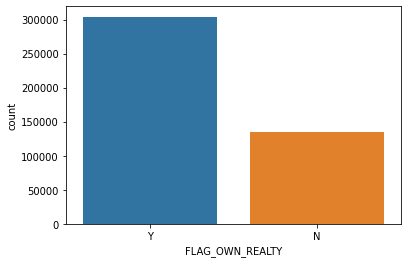

time: 297 ms (started: 2022-12-18 10:20:20 -06:00)


In [9]:
print(app_rec.FLAG_OWN_REALTY.unique())
sns.countplot(x ="FLAG_OWN_REALTY", data = app_rec)
plt.show()

['M' 'F']
['Y' 'N']
['Y' 'N']
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
[nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']


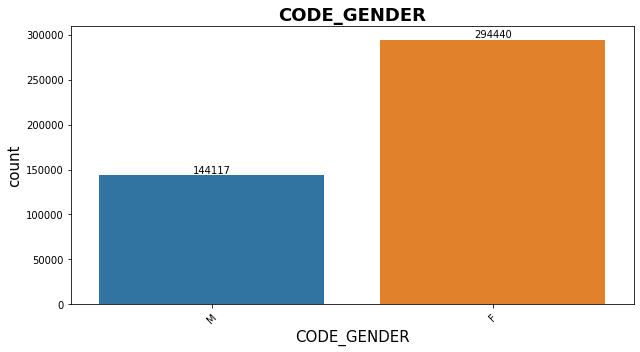

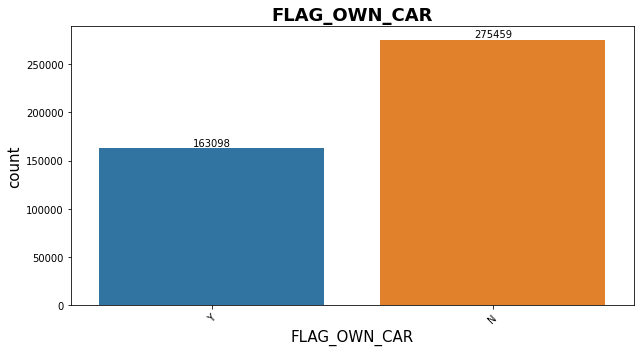

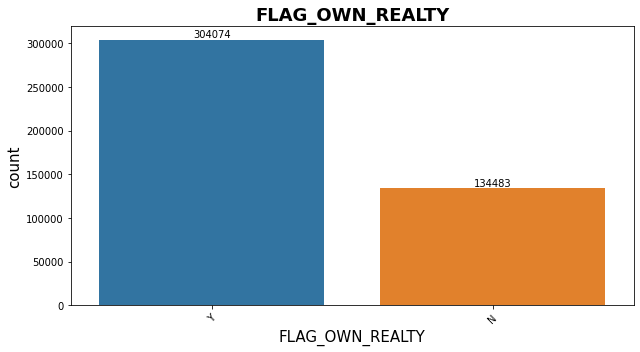

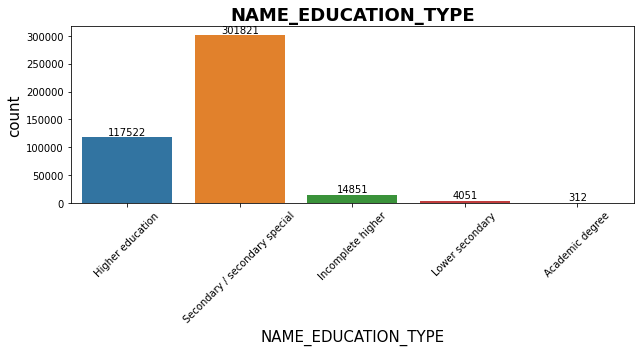

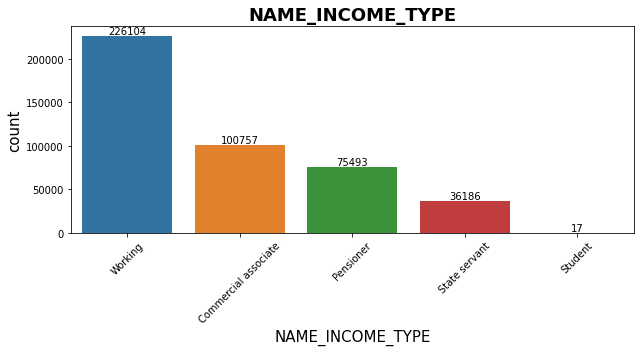

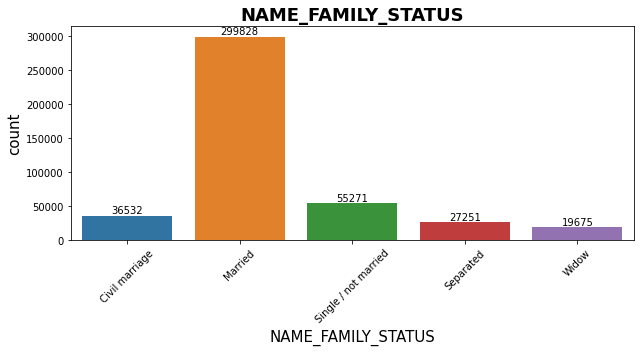

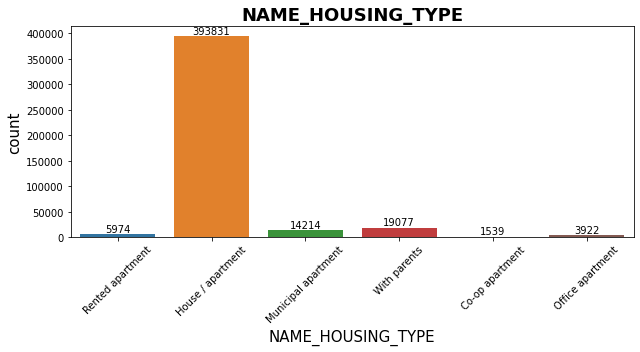

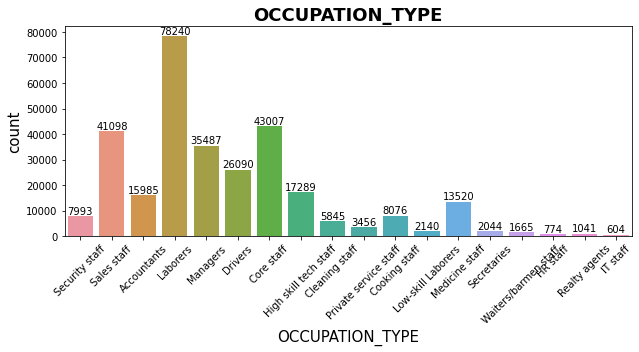

time: 4.44 s (started: 2022-12-18 10:20:20 -06:00)


In [10]:
# Print the different values in object fiels.
print(app_rec.CODE_GENDER.unique())
print(app_rec.FLAG_OWN_CAR.unique())
print(app_rec.FLAG_OWN_REALTY.unique())
print(app_rec.NAME_INCOME_TYPE.unique())
print(app_rec.NAME_EDUCATION_TYPE.unique())
print(app_rec.NAME_FAMILY_STATUS.unique())
print(app_rec.NAME_HOUSING_TYPE.unique())
print(app_rec.OCCUPATION_TYPE.unique())
# Create a for loop for visualization of frequency of items in each aforementioned columns.
for var in ["CODE_GENDER","FLAG_OWN_CAR",	"FLAG_OWN_REALTY", 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE',   'NAME_FAMILY_STATUS',  'NAME_HOUSING_TYPE','OCCUPATION_TYPE']:
    # countplt, ax = plt.subplots(figsize = (10,7))
    plt.rcParams["figure.figsize"] = [9, 5]
    plt.rcParams["figure.autolayout"] = True
    ax = sns.countplot(x =var, data = app_rec)
    ax.set_title(var,fontsize = 18, fontweight='bold' )
    ax.bar_label(ax.containers[0])
    ax.set_xlabel(var, fontsize = 15)
    ax.set_ylabel('count', fontsize = 15)
    plt.xticks(rotation=45, fontsize="10")
    plt.show()

In [11]:
#Check the Numeric fields
app_rec.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,438557.0,6.022176e+06,571637.023257,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0
CNT_CHILDREN,438557.0,4.273903e-01,0.724882,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,438557.0,1.875243e+05,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0
DAYS_BIRTH,438557.0,-1.599790e+04,4185.030007,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0
DAYS_EMPLOYED,438557.0,6.056368e+04,138767.799647,-17531.0,-3103.0,-1467.0,-371.0,365243.0
FLAG_MOBIL,438557.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,438557.0,2.061328e-01,0.404527,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,438557.0,2.877710e-01,0.452724,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,438557.0,1.082071e-01,0.310642,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,438557.0,2.194465e+00,0.897207,1.0,2.0,2.0,3.0,20.0


time: 188 ms (started: 2022-12-18 10:20:25 -06:00)


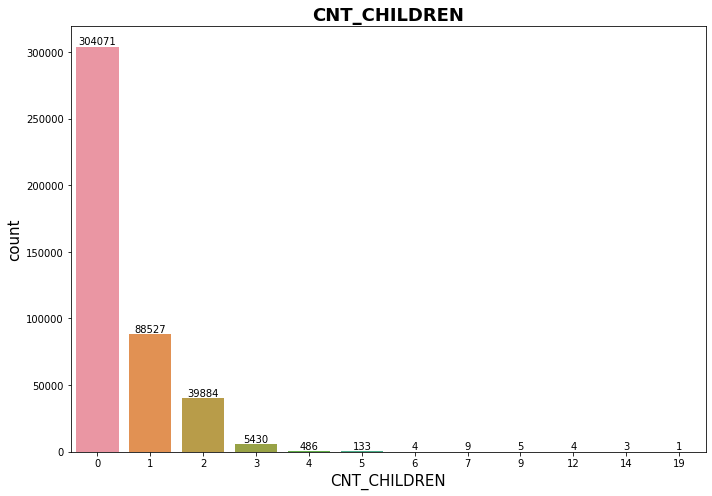

time: 375 ms (started: 2022-12-18 10:20:25 -06:00)


In [12]:
for var in ['CNT_CHILDREN']:  # It doenot have so much variables range. That is why I selected countplot for a "int64" column.
    countplt, ax = plt.subplots(figsize = (10,7))
    plt.rcParams["figure.figsize"] = [10, 7]
    plt.rcParams["figure.autolayout"] = True
    ax =  sns.countplot(x=var, data = app_rec)
    ax.set_title(var,fontsize = 18, fontweight='bold' )
    ax.bar_label(ax.containers[0])
    ax.set_xlabel(var, fontsize = 15)
    ax.set_ylabel('count', fontsize = 15)
    plt.show()

# My Graphs does not work correctly. Question from Saee: WHat I should do for th barplot?

C:\Users\shaha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


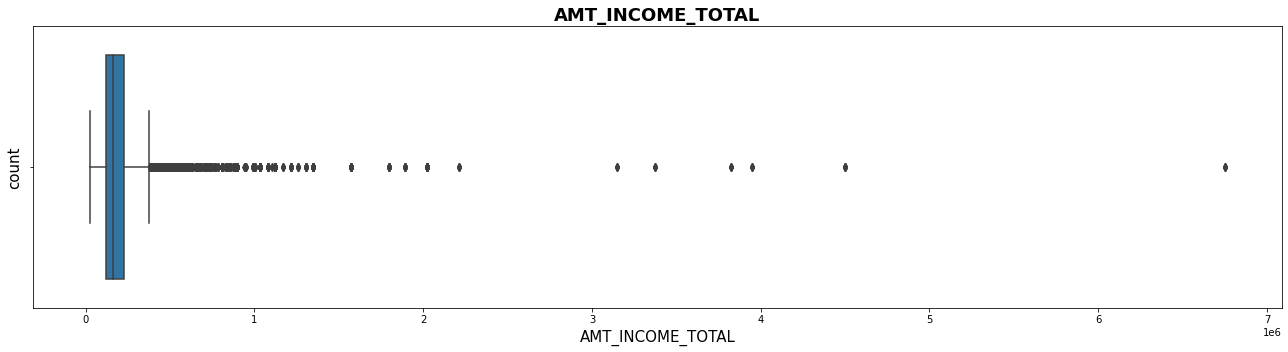

C:\Users\shaha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


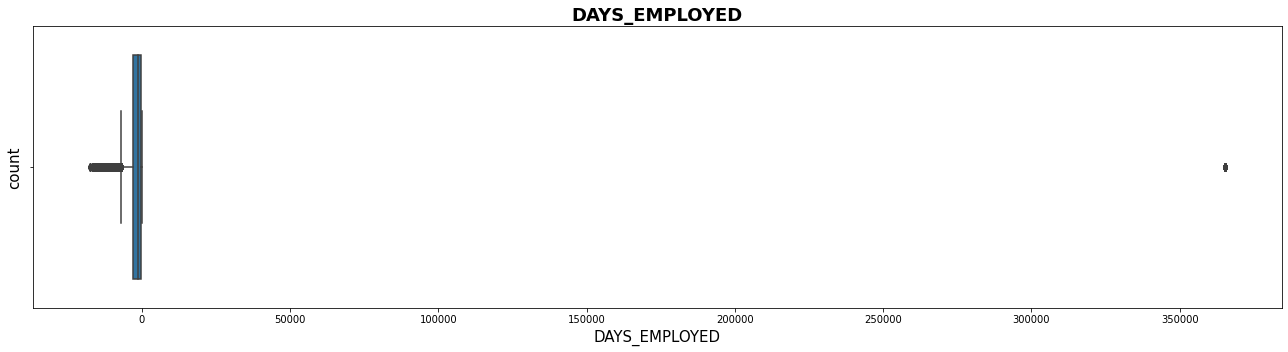

time: 562 ms (started: 2022-12-18 10:20:25 -06:00)


In [13]:
for var in ['AMT_INCOME_TOTAL',  'DAYS_EMPLOYED']:   # These 2 columns have a whide range of numerical values. Therefore, I used boxplot graph.
    plt.rcParams["figure.figsize"] = [18, 5]
    plt.rcParams["figure.autolayout"] = True
    ax.set(yscale="log")
    ax =  sns.boxplot(app_rec[var])
    ax.set_title(var,fontsize = 18, fontweight='bold' )
    ax.set_xlabel(var, fontsize = 15)
    ax.set_ylabel('count', fontsize = 15)
    plt.show()

In [14]:
#Check Duplicate rows.
app_rec.duplicated().sum()

0

time: 391 ms (started: 2022-12-18 10:20:26 -06:00)


We do not have any duplicated rows. However, we have dublicated IDs:

In [15]:
app_rec.ID.duplicated().sum()

47

time: 15 ms (started: 2022-12-18 10:20:26 -06:00)


In [16]:
# filter the data to find and evaluate rows with duplicated IDs:
app_rec_dup_ID = app_rec[app_rec['ID'].duplicated(keep=False) == True].sort_values(by=['ID']).reset_index(drop=True)
app_rec_dup_ID

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,7022197,M,Y,Y,3,135000.0,Working,Secondary / secondary special,Married,House / apartment,-11945,-735,1,0,0,1,Laborers,5.0
1,7022197,F,N,Y,0,450000.0,Commercial associate,Higher education,Separated,House / apartment,-19813,-1799,1,0,0,1,NaN,1.0
2,7022327,F,N,Y,0,135000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-14771,-5298,1,0,0,0,High skill tech staff,1.0
3,7022327,M,Y,Y,0,256500.0,Commercial associate,Higher education,Married,House / apartment,-21503,-1674,1,0,0,1,Core staff,2.0
4,7023108,M,Y,Y,1,67500.0,Working,Secondary / secondary special,Married,House / apartment,-15156,-1696,1,1,0,0,Core staff,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,7836711,F,N,Y,2,292500.0,Working,Higher education,Married,House / apartment,-13747,-4386,1,0,1,0,Accountants,4.0
90,7836971,M,Y,N,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13771,-5520,1,0,0,0,NaN,3.0
91,7836971,F,N,Y,0,103500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13383,-2798,1,0,1,0,Sales staff,2.0
92,7838075,M,N,Y,0,337500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18198,-1275,1,0,0,1,Drivers,2.0


time: 47 ms (started: 2022-12-18 10:20:26 -06:00)


Due to the sensitivity of the duplication of ID, as a key, I decided to drop all rows with duplicated IDs.(please see the cleaning part)

In [17]:
#check Missing Values
app_rec.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

time: 500 ms (started: 2022-12-18 10:20:26 -06:00)


In [18]:
# Check the OCCUPATION_Type:

# print("Number of Missing Values:", app_rec.OCCUPATION_TYPE.isnull().sum())
# app_rec.OCCUPATION_TYPE.value_counts()

app_rec.OCCUPATION_TYPE.value_counts(dropna = False)  # The same as above but much more efficient!


NaN                      134203
Laborers                  78240
Core staff                43007
Sales staff               41098
Managers                  35487
Drivers                   26090
High skill tech staff     17289
Accountants               15985
Medicine staff            13520
Cooking staff              8076
Security staff             7993
Cleaning staff             5845
Private service staff      3456
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

time: 16 ms (started: 2022-12-18 10:20:27 -06:00)


# Data Cleaning

In [19]:
# Change the data type of the 'ID' to string data type:
columns = ['ID']#,'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']
for column in columns:
    app_rec[column] = app_rec[column].astype(str)
    
print(app_rec["ID"].dtypes)

object
time: 156 ms (started: 2022-12-18 10:20:27 -06:00)


In [20]:
# We can assign "Other" for null values. 
app_rec["OCCUPATION_TYPE"].fillna("Other", inplace = True)

time: 31 ms (started: 2022-12-18 10:20:27 -06:00)


In [21]:
#Remove the duplicates values for IDs:
app_rec = app_rec.drop_duplicates(subset=['ID']).reset_index(drop=True)  # the reset index is so important> Otherwise, we will have many errors in next steps!!!

time: 234 ms (started: 2022-12-18 10:20:27 -06:00)


In [22]:
# Note:For DAYS_EMPLOYED, positive value which is 365K means "Unemployed". We can replace any positive value with 0 to have a balance field.
# Replace any positive value of DAYS_EMPLOYED with 0:

app_rec['DAYS_EMPLOYED'] = app_rec['DAYS_EMPLOYED'].apply(lambda x: 0 if x > 0 else x)

time: 157 ms (started: 2022-12-18 10:20:28 -06:00)


# Feature Engineering
##### creating new columns/features from existing columns!

In [23]:
## Create an employement flag fom DAYS_EMPLOYED.
# app_rec['FLAG_EMPLOYED2'] = app_rec['DAYS_EMPLOYED'].apply(lambda x: 1 if x > 0 else 0).astype(str)

## New: Bolean based on a condition instead of above code.
app_rec["FLAG_EMPLOYED"] = app_rec['DAYS_EMPLOYED'] < 0 

# Create month_employed from DAYS_EMPLOYED.
app_rec["MONTH_EMPLOYED"] = (app_rec["DAYS_EMPLOYED"]/30).abs().apply(np.ceil) 
app_rec[["FLAG_EMPLOYED", "MONTH_EMPLOYED","DAYS_EMPLOYED"] ]

# we need drop the "DAYS_EMPLOYED" before loading the data for model development!

,FLAG_EMPLOYED,MONTH_EMPLOYED,DAYS_EMPLOYED
0,True,152.0,-4542
1,True,152.0,-4542
2,True,38.0,-1134
3,True,102.0,-3051
4,True,102.0,-3051
...,...,...,...
438505,False,0.0,0
438506,True,101.0,-3007
438507,True,13.0,-372
438508,False,0.0,0


time: 62 ms (started: 2022-12-18 10:20:28 -06:00)


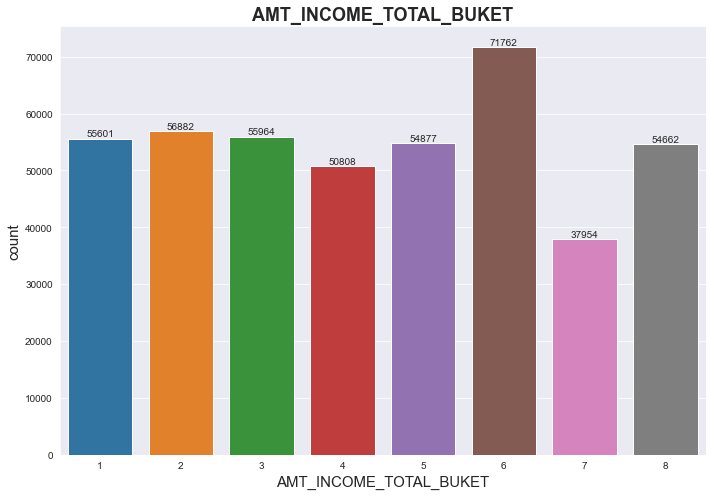

time: 234 ms (started: 2022-12-18 10:20:28 -06:00)


In [24]:
# we have outliers in AMT_INCOME_TOTAL. We have 2 choices, either remove the outliers or creat buckets for values based on the 8 percentile groups. 
# The second option was selected. Since we have mathematical relationship between buckets, we do not need to use onehot encoding technique for "AMT_INCOME_TOTAL_BUKET"

# Create Buckets based on 8 percentail groups:
app_rec['AMT_INCOME_TOTAL_BUKET'], cut_bin = pd.qcut(app_rec['AMT_INCOME_TOTAL'], q = 8, labels = ['1','2','3','4','5','6','7','8'], retbins = True)   # How I can see the ranges in number! https://theprogrammingexpert.com/pandas-percentile/#:~:text=To%20find%20percentiles%20of%20a%20numeric%20column%20in,can%20also%20use%20the%20numpy%20percentile%20%28%29%20function.

# Visualize the groups of incomes:
for var in ['AMT_INCOME_TOTAL_BUKET']: 
    plt.rcParams["figure.figsize"] = [10, 7]
    plt.rcParams["figure.autolayout"] = True
    sns.set_style("darkgrid")
    ax =  sns.countplot(x=var, data = app_rec)
    ax.set_title(var,fontsize = 18, fontweight='bold' )
    ax.bar_label(ax.containers[0])
    ax.set_xlabel(var, fontsize = 15)
    ax.set_ylabel('count', fontsize = 15)
    plt.show()

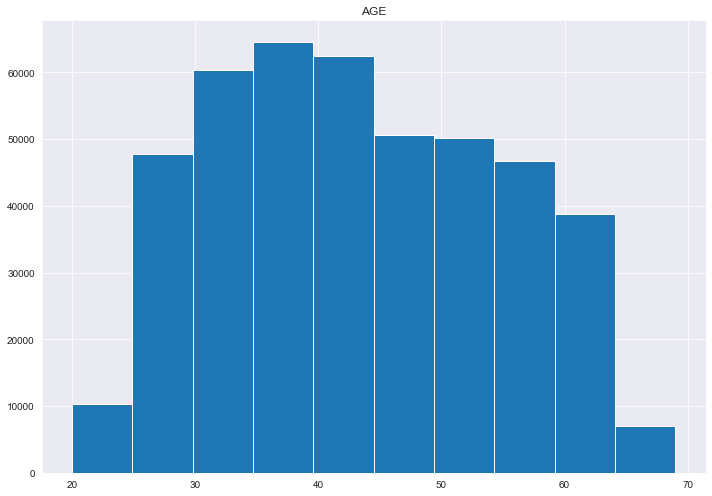

time: 328 ms (started: 2022-12-18 10:20:28 -06:00)


In [25]:
# Create Age based on DAYS_BIRTH.
app_rec['AGE'] = (app_rec['DAYS_BIRTH']/365).abs().apply(np.floor)
app_rec.hist(column='AGE');

In [26]:
# Use OneHot_encoding to create binary values for 4 different fiels (see the above cell):  
# Saeed's Comment: We can convert Education Type to numeric because it has mathematical meaning, but Family Status and other should be changed to OneHot Encoding! In this example I kept it in Get Dummy!
app_rec = pd.get_dummies(data=app_rec, columns=["CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","OCCUPATION_TYPE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE"])#.astype(str)

time: 406 ms (started: 2022-12-18 10:20:28 -06:00)


In [27]:
app_rec = app_rec.drop(['AMT_INCOME_TOTAL',"DAYS_EMPLOYED",'DAYS_BIRTH'],axis = 1)

time: 94 ms (started: 2022-12-18 10:20:29 -06:00)


In [28]:
app_rec.to_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\app_rec_processed.csv', index=False)

time: 3.81 s (started: 2022-12-18 10:20:29 -06:00)


# B - Credit Record (cre_rec) Data Cleaning & Transforming

In [29]:
# Count the repeatation of each ID number to find out the age of each account (Month)
cre_rec['COUNT'] = cre_rec.groupby('ID')['ID'].transform('count')

time: 47 ms (started: 2022-12-18 10:20:33 -06:00)


In [30]:
cre_rec.shape

(1048575, 4)

time: 15 ms (started: 2022-12-18 10:20:33 -06:00)


In [31]:
# Delete accounts with less than 12 month age for modeling.
cre_rec = cre_rec.loc[cre_rec['COUNT']>12,:].reset_index(drop=True)

time: 62 ms (started: 2022-12-18 10:20:33 -06:00)


In [32]:
cre_rec.shape

(943061, 4)

time: 16 ms (started: 2022-12-18 10:20:33 -06:00)


In [33]:
print('to find the unique number of IDs:',cre_rec.ID.nunique())
print("Shape of the dataset:" ,cre_rec.shape)
print("Name of the columns:" ,cre_rec.columns)

to find the unique number of IDs: 30918
Shape of the dataset: (943061, 4)
Name of the columns: Index(['ID', 'MONTHS_BALANCE', 'STATUS', 'COUNT'], dtype='object')
time: 16 ms (started: 2022-12-18 10:20:33 -06:00)


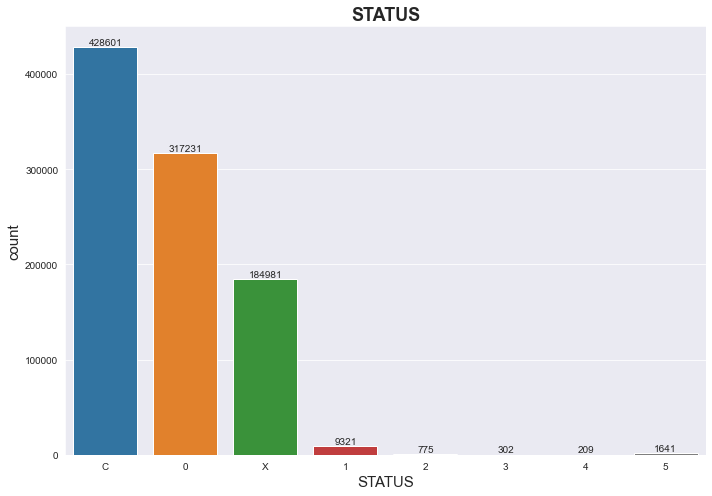

time: 625 ms (started: 2022-12-18 10:20:33 -06:00)


In [34]:

ax =  sns.countplot(x='STATUS', data = cre_rec)
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
ax.set_title('STATUS',fontsize = 18, fontweight='bold' )
ax.bar_label(ax.containers[0])
ax.set_xlabel('STATUS', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
plt.show()

Feature enginering for Creadit Records datasets!

In [35]:
# Create a new numerical column based on the status column and then calculate the average of delinquicy for last 6 months
cre_rec['Modified_STATUS'] = cre_rec['STATUS'].replace(['X','C'],0).astype(int)
# Work well!
cre_rec['rolling_average'] = cre_rec.groupby('ID')['Modified_STATUS'].transform(lambda x: x.rolling(3, 1).mean())

time: 7.33 s (started: 2022-12-18 10:20:34 -06:00)


In [36]:
cre_rec['BINARY_STATUS'] = cre_rec['STATUS'].replace(['X','0','C'],0)
cre_rec['BINARY_STATUS'] = cre_rec['BINARY_STATUS'].replace(['1','2','3','4','5'],1)

time: 813 ms (started: 2022-12-18 10:20:41 -06:00)


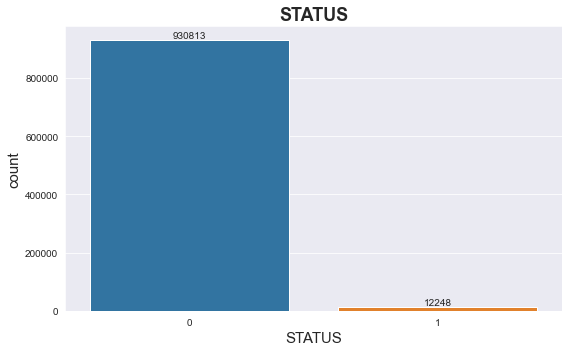

time: 297 ms (started: 2022-12-18 10:20:42 -06:00)


In [37]:
ax =  sns.countplot(x='BINARY_STATUS', data = cre_rec)
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
ax.set_title('STATUS',fontsize = 18, fontweight='bold' )
ax.bar_label(ax.containers[0])
ax.set_xlabel('STATUS', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
plt.show()

In [38]:
cre_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943061 entries, 0 to 943060
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               943061 non-null  int64  
 1   MONTHS_BALANCE   943061 non-null  int64  
 2   STATUS           943061 non-null  object 
 3   COUNT            943061 non-null  int64  
 4   Modified_STATUS  943061 non-null  int32  
 5   rolling_average  943061 non-null  float64
 6   BINARY_STATUS    943061 non-null  int64  
dtypes: float64(1), int32(1), int64(4), object(1)
memory usage: 46.8+ MB
time: 172 ms (started: 2022-12-18 10:20:42 -06:00)


In [39]:
cre_rec.sort_values(by=['ID',"MONTHS_BALANCE"], ascending=False)

,ID,MONTHS_BALANCE,STATUS,COUNT,Modified_STATUS,rolling_average,BINARY_STATUS
943031,5150487,0,C,30,0,0.0,0
943032,5150487,-1,C,30,0,0.0,0
943033,5150487,-2,C,30,0,0.0,0
943034,5150487,-3,C,30,0,0.0,0
943035,5150487,-4,C,30,0,0.0,0
...,...,...,...,...,...,...,...
14,5001712,-14,0,19,0,0.0,0
15,5001712,-15,0,19,0,0.0,0
16,5001712,-16,0,19,0,0.0,0
17,5001712,-17,0,19,0,0.0,0


time: 266 ms (started: 2022-12-18 10:20:43 -06:00)


In [40]:
%%time
def my_core_Function(CID, TID,Tlag):
    try:
        Lag_Label = list(cre_rec.loc[(cre_rec["ID"] == CID) & (cre_rec["MONTHS_BALANCE"] == (TID+Tlag)), "BINARY_STATUS"])[0]
    except:
        Lag_Label = np.nan
    return Lag_Label

CPU times: total: 0 ns
Wall time: 0 ns
time: 0 ns (started: 2022-12-18 10:20:43 -06:00)


In [41]:
# Create a lable column by applying the function into the dataframe. In the step, we create a new column with 3 month lag of delinquency.
# progress_apply is the same as apply, but it shows the progressbar which is very helpful to monitor the progress, specially for large dataframes.

cre_rec.loc[:,"3M_LABEL"] = cre_rec.progress_apply(lambda x: my_core_Function(x["ID"], x["MONTHS_BALANCE"],3), axis=1)


100%|██████████| 943061/943061 [36:20<00:00, 432.55it/s]  

time: 36min 20s (started: 2022-12-18 10:20:43 -06:00)


In [42]:
cre_rec.head(5)

,ID,MONTHS_BALANCE,STATUS,COUNT,Modified_STATUS,rolling_average,BINARY_STATUS,3M_LABEL
0,5001712,0,C,19,0,0.0,0,NaN
1,5001712,-1,C,19,0,0.0,0,NaN
2,5001712,-2,C,19,0,0.0,0,NaN
3,5001712,-3,C,19,0,0.0,0,0.0
4,5001712,-4,C,19,0,0.0,0,0.0


time: 0 ns (started: 2022-12-18 10:57:03 -06:00)


In [43]:
# Change the ID to Object data tyoe
cre_rec["ID"] = cre_rec["ID"].astype(str)
cre_rec

,ID,MONTHS_BALANCE,STATUS,COUNT,Modified_STATUS,rolling_average,BINARY_STATUS,3M_LABEL
0,5001712,0,C,19,0,0.0,0,NaN
1,5001712,-1,C,19,0,0.0,0,NaN
2,5001712,-2,C,19,0,0.0,0,NaN
3,5001712,-3,C,19,0,0.0,0,0.0
4,5001712,-4,C,19,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...
943056,5150487,-25,C,30,0,0.0,0,0.0
943057,5150487,-26,C,30,0,0.0,0,0.0
943058,5150487,-27,C,30,0,0.0,0,0.0
943059,5150487,-28,C,30,0,0.0,0,0.0


time: 390 ms (started: 2022-12-18 10:57:03 -06:00)


In [44]:
# Saved the processed data.
cre_rec.to_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\credit_record_processed.csv', index=False)

time: 2.49 s (started: 2022-12-18 10:57:04 -06:00)


# C - Merge the Data Sets

In [45]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()

time: 0 ns (started: 2022-12-18 10:57:06 -06:00)


In [46]:
# Read the saved data
app_rec_prcd = pd.read_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\app_rec_processed.csv')
cre_rec_prcd = pd.read_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\credit_record_processed.csv')

time: 1.84 s (started: 2022-12-18 10:57:06 -06:00)


In [47]:
print(app_rec_prcd.shape)
print(cre_rec_prcd.shape)
cre_rec_prcd.head()

(438510, 57)
(943061, 8)


,ID,MONTHS_BALANCE,STATUS,COUNT,Modified_STATUS,rolling_average,BINARY_STATUS,3M_LABEL
0,5001712,0,C,19,0,0.0,0,NaN
1,5001712,-1,C,19,0,0.0,0,NaN
2,5001712,-2,C,19,0,0.0,0,NaN
3,5001712,-3,C,19,0,0.0,0,0.0
4,5001712,-4,C,19,0,0.0,0,0.0


time: 16 ms (started: 2022-12-18 10:57:08 -06:00)


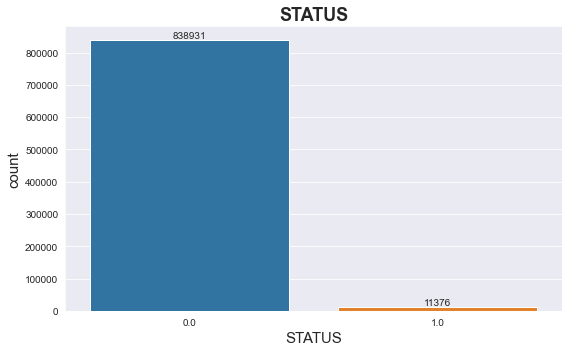

time: 219 ms (started: 2022-12-18 10:57:08 -06:00)


In [48]:
ax =  sns.countplot(x='3M_LABEL', data = cre_rec_prcd)
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
ax.set_title('STATUS',fontsize = 18, fontweight='bold' )
ax.bar_label(ax.containers[0])
ax.set_xlabel('STATUS', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
plt.show()
# We have Imbalanced Data!!!!

In [49]:
# Merge 2 datasets based on the id
data = pd.merge(app_rec_prcd,cre_rec_prcd,on='ID',how='inner').reset_index(drop=True)

time: 1.36 s (started: 2022-12-18 10:57:08 -06:00)


In [50]:
data.shape

(687454, 64)

time: 0 ns (started: 2022-12-18 10:57:10 -06:00)


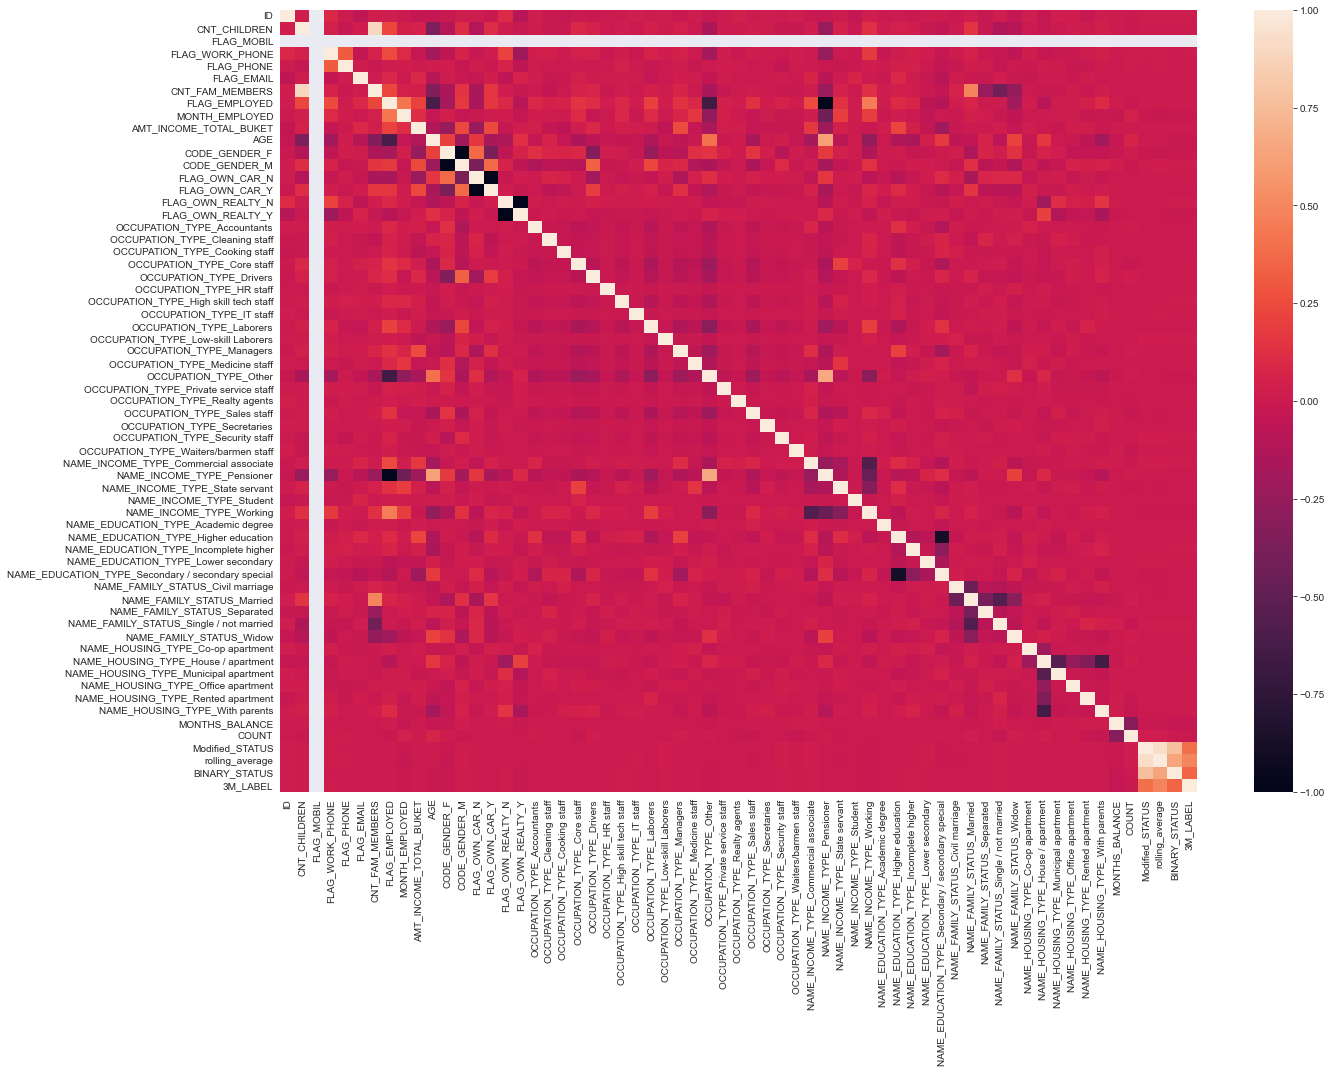

time: 12.8 s (started: 2022-12-18 10:57:10 -06:00)


In [51]:
# Create a correlation heatmap to assess the correlation between all columns.
plt.rcParams["figure.figsize"] = [20,15]
ax = sns.heatmap(data.corr())

In [52]:
data = data.set_index(["ID", "MONTHS_BALANCE"])  
data.columns

Index(['CNT_CHILDREN', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'FLAG_EMPLOYED', 'MONTH_EMPLOYED',
       'AMT_INCOME_TOTAL_BUKET', 'AGE', 'CODE_GENDER_F', 'CODE_GENDER_M',
       'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_N',
       'FLAG_OWN_REALTY_Y', 'OCCUPATION_TYPE_Accountants',
       'OCCUPATION_TYPE_Cleaning staff', 'OCCUPATION_TYPE_Cooking staff',
       'OCCUPATION_TYPE_Core staff', 'OCCUPATION_TYPE_Drivers',
       'OCCUPATION_TYPE_HR staff', 'OCCUPATION_TYPE_High skill tech staff',
       'OCCUPATION_TYPE_IT staff', 'OCCUPATION_TYPE_Laborers',
       'OCCUPATION_TYPE_Low-skill Laborers', 'OCCUPATION_TYPE_Managers',
       'OCCUPATION_TYPE_Medicine staff', 'OCCUPATION_TYPE_Other',
       'OCCUPATION_TYPE_Private service staff',
       'OCCUPATION_TYPE_Realty agents', 'OCCUPATION_TYPE_Sales staff',
       'OCCUPATION_TYPE_Secretaries', 'OCCUPATION_TYPE_Security staff',
       'OCCUPATION_TYPE_Waiters/barmen staff',
    

time: 203 ms (started: 2022-12-18 10:57:23 -06:00)


question for Saeed: why we created multi index with these 2 columns?

In [53]:
#Save the Cleaned Data and we will use this dataset for model development in next step.
data.to_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\Final_Data.csv')

time: 13.6 s (started: 2022-12-18 10:57:23 -06:00)


In [54]:
import winsound
frequency = 4000  # Set Frequency To 2500 Hertz
duration = 2000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

time: 2.03 s (started: 2022-12-18 10:57:37 -06:00)


# End of EDA!